<a href="https://colab.research.google.com/github/meghana-1512/CODSOFT/blob/machine-learning/TASK4_CODSOFT_SPAM_SMS_DETECTION_using_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##SPAM SMS DETECTION using SVM

In [1]:
#import libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Load the dataset, specifying the encoding
file_path = '/content/spam.csv'  # Replace with your file path
data = pd.read_csv(file_path, encoding='latin-1')

In [3]:
# Display the first few rows and columns of the dataset
print("First few rows of the dataset:")
print(data.head())
print("\nColumns in the dataset:")
print(data.columns)

First few rows of the dataset:
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  

Columns in the dataset:
Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [4]:
# Check the actual column names and adjust if needed
text_column = 'v2'  # Update with the correct column name for SMS messages
target_column = 'v1'  # Update with the correct column name for spam/ham labels

In [5]:


# Ensure the target column exists
if target_column not in data.columns:
    raise KeyError(f"The column '{target_column}' does not exist in the dataset.")
if text_column not in data.columns:
    raise KeyError(f"The column '{text_column}' does not exist in the dataset.")

In [6]:
# Prepare the features and target variable
X = data[text_column]  # SMS messages
y = data[target_column]  # Target variable (spam or not spam)

In [7]:

# Convert text data to numeric features using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X_vectorized = vectorizer.fit_transform(X)

In [8]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.3, random_state=42)

In [12]:
# Define the parameter grid to search
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(SVC(), param_grid, cv=5)  # Example using SVC
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]})

In [13]:
# Get the best estimator from the grid search
best_model = grid_search.best_estimator_

In [14]:

# Make predictions with the best model
y_pred = best_model.predict(X_test)

In [16]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")


Accuracy: 0.98


In [17]:

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1449    4]
 [  33  186]]

Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1453
        spam       0.98      0.85      0.91       219

    accuracy                           0.98      1672
   macro avg       0.98      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672



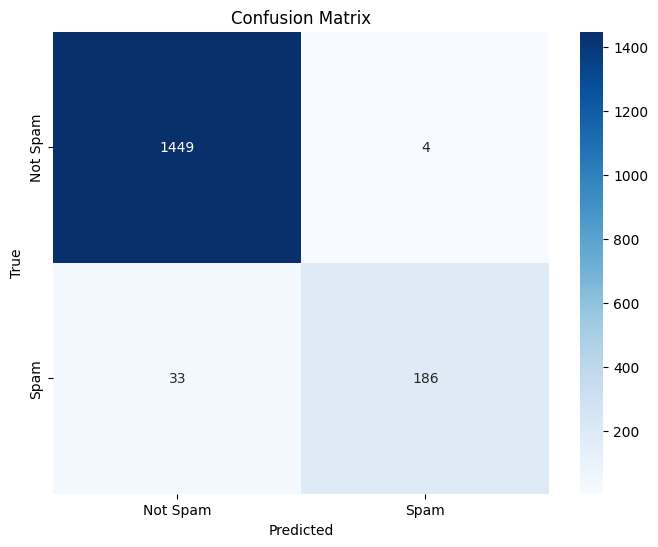

In [18]:
# Optional: Plotting the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

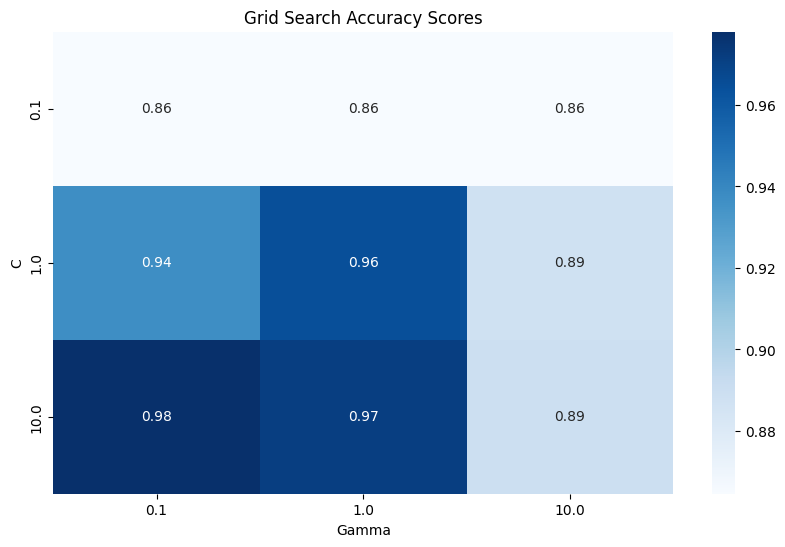

In [19]:
# Optional: Plotting accuracy scores from Grid Search
results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(10, 6))
scores_matrix = results.pivot_table(index='param_C', columns='param_gamma', values='mean_test_score')
sns.heatmap(scores_matrix, annot=True, cmap='Blues')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('Grid Search Accuracy Scores')
plt.show()